In [ ]:
## Attempt 1
import tkinter as tk
import IPython
from nltk.nltk_contrib.fst.fst import *

class MyFST(FST):
    def recognize(self, iput, oput):
        self.inp = list(iput)
        self.outp = list(oput)

        if self.transduce(list(iput)) == list(oput):
            return True
        else:
            return False

class ChineseEnglishTransliterator(MyFST):
    def __init__(self, label):
        super().__init__(label=label)

        # Define states
        for _ in range(14):
            self.add_state(label=str(IPython))

        # Final states
        final_states = ['8', '9', '12']
        for state in self.states():  
            if state in final_states:
                self.set_final(state)

        # Initial state
        self.initial_state = '0'

        # Defined arcs based on the provided table
        self.add_arc(0, 1, 'b', 'b')
        self.add_arc(1, 1, 'ē', 'e')
        self.add_arc(1, 1, 'n', 'n')
        self.add_arc(1, 2, 'g', 'g')
        self.add_arc(2, 2, 'd', 'd')
        self.add_arc(2, 2, 'ài', 'a')
        self.add_arc(2, 2, '#', '#')

        self.add_arc(0, 3, 'l', 'l')
        self.add_arc(3, 3, 'ě', 'e')
        self.add_arc(3, 3, 'i', 'i')
        self.add_arc(3, 4, 'g', 'g')
        self.add_arc(4, 4, 'q', 'q')
        self.add_arc(4, 4, 'í', 'i')
        self.add_arc(4, 4, '#', '#')

        self.add_arc(0, 5, 'g', 'g')
        self.add_arc(5, 5, 'a', 'a')
        self.add_arc(5, 5, '#', '#')
        self.add_arc(5, 5, 'l', 'l')
        self.add_arc(5, 5, 'i', 'i')

        self.add_arc(0, 6, 'ā', 'c')
        self.add_arc(6, 6, 'm', 'm')
        self.add_arc(6, 6, 'ó', 'o')
        self.add_arc(6, 6, 'ní', 'n')
        self.add_arc(6, 7, 'yà', 'y')
        self.add_arc(7, 7, '#', '#')

        self.add_arc(0, 8, 'ā', 'a')
        self.add_arc(8, 8, 's', 's')
        self.add_arc(8, 8, 'ī', 'i')
        self.add_arc(8, 8, 'p', 'p')
        self.add_arc(8, 8, 'l', 'l')
        self.add_arc(8, 8, 'ín', 'in')
        self.add_arc(8, 9, '#', '#')

    def arcs(self, state):
        return [(arc.nextstate, arc.ilabel, arc.olabel) for arc in self.arcs(state)]

    def recognize(self, input_syllable, output_pattern):
        return super().recognize(input_syllable, output_pattern)

    def get_states(self):
        return list(self.states())

# Instance of the ChineseEnglishTransliterator
transliterator = ChineseEnglishTransliterator(label='chinglish_transliterator')

# Defined input and output for recognition
inp = "ab##bb"
outp = "10111#"
print(inp)

# Recognize function defined in ChineseEnglishTransliterator
if transliterator.recognize(inp, outp):
    print(outp)
    print("accept")
else:
    print("reject")

# Displays the FST using Tkinter
class FSTDisplay:
    def __init__(self, fst):
        self.fst = fst
        self.window = tk.Tk()
        self.canvas = tk.Canvas(self.window, width=500, height=500)
        self.canvas.pack()

        self.draw_states()
        self.draw_arcs()

    def draw_states(self):
        for state in self.fst.get_states():
            x, y = state * 20, 100
            self.canvas.create_oval(x, y, x + 10, y + 10, fill="white", outline="black")
            self.canvas.create_text(x + 5, y + 5, text=str(state), font=('Helvetica', 8, 'bold'))

    def draw_arcs(self):
        for state in self.fst.get_states():
            for next_state, ilabel, olabel in self.fst.arcs(state):
                x1, y1 = state * 20 + 10, 120
                x2, y2 = next_state * 20, 140
                self.canvas.create_line(x1, y1, x2, y2, arrow=tk.LAST)
                self.canvas.create_text((x1 + x2) / 2, (y1 + y2) / 2, text=f"{ilabel}:{olabel}", font=('Helvetica', 8))

    def display(self):
        self.window.title("FST Display")
        self.window.mainloop()

# FST Display using Tkinter 
display = FSTDisplay(transliterator)
display.display()

In [ ]:
## Attempt 2
from nltk.nltk_contrib.fst.fst import *
from tkinter import *

class ChinglishFST(FST):
    def recognize(self, input_str):
        output_str = self.transduce(list(input_str))
        return " ".join(output_str)

# Define the states and transitions
f = ChinglishFST('chinglish_transliteration')
state_labels = {}

# Function to add state and return the label
def add_state(label):
    state_labels[label] = True
    f.add_state(label)
    return label

# Added arcs | Mapping of Pinyin to English Loan Word
f.add_arc(add_state('1'), add_state('2'), ('bēng', 'dài'), ('band','age'))
f.add_arc(add_state('3'), add_state('4'), ('āmó', 'níyà'), ('ammo','nia'))
f.add_arc(add_state('5'), add_state('6'), ('āsī','pí','lín'), ('as','pi','rin'))
f.add_arc(add_state('7'), add_state('8'), ('shì','duō','pí','lí'), ('straw','ber','ry'))
f.add_arc(add_state('9'), add_state('10'), ('bèi','guǒ'), ('ba','gel'))
f.add_arc(add_state('11'), add_state('12'), ('sāng','ná'), ('hea','lth'))
f.add_arc(add_state('13'), add_state('14'), ('bānz','huó','qín'), ('ban','jo'))
f.add_arc(add_state('15'), add_state('16'), ('mǎ','kè','bēi'), ('mug'))
f.add_arc(add_state('17'), add_state('18'), ('bā','lěi'), ('ba','llet'))
f.add_arc(add_state('19'), add_state('20'), ('mài','kè','fēng'), ('mi','cro','phone'))
f.add_arc(add_state('21'), add_state('22'), ('bù','lǔ','sī'), ('blues'))
f.add_arc(add_state('23'), add_state('24'), ('mǎ','shā','jī'), ('mas','sage'))
f.add_arc(add_state('25'), add_state('26'), ('bā','shì'), ('bus'))
f.add_arc(add_state('27'), add_state('28'), ('níng','méng'), ('le','mon'))
f.add_arc(add_state('29'), add_state('30'), ('kā','fēi','yīn'), ('caf','fei','ne'))
f.add_arc(add_state('31'), add_state('32'), ('jiā','kè'), ('jac','ket'))
f.add_arc(add_state('33'), add_state('34'), ('kǎ','lù','lǐ'), ('ca','lo','rie'))
f.add_arc(add_state('35'), add_state('36'), ('sù','kè','dá'), ('scoo','ter'))
f.add_arc(add_state('37'), add_state('38'), ('kǎ','tōng'), ('car','toon'))
f.add_arc(add_state('39'), add_state('40'), ('xiāng','bō'), ('sham','poo'))
f.add_arc(add_state('41'), add_state('42'), ('zhī','shì'), ('che','ese'))
f.add_arc(add_state('43'), add_state('44'), ('shì','duō','pí','lí'), ('straw','ber','ry'))
f.add_arc(add_state('45'), add_state('46'), ('qiǎo','kè','lì'), ('cho','co','late'))
f.add_arc(add_state('47'), add_state('48'), ('jí','tā'), ('gui','tar'))
f.add_arc(add_state('49'), add_state('50'), ('kā','fēi'), ('cof','fee'))
f.add_arc(add_state('51'), add_state('52'), ('hā','ní'), ('ho','ney'))
f.add_arc(add_state('53'), add_state('54'), ('qǔ','qí'), ('coo','kie'))
f.add_arc(add_state('55'), add_state('56'), ('léi','shè'), ('la','ser'))
f.add_arc(add_state('57'), add_state('58'), ('shā','fā'), ('so','fa'))
f.add_arc(add_state('59'), add_state('60'), ('ní','lóng'), ('ny','lon'))
f.add_arc(add_state('61'), add_state('62'), ('gā','lí'), ('cur','ry'))
f.add_arc(add_state('63'), add_state('64'), ('dī','shì'), ('ta','xi'))
f.add_arc(add_state('65'), add_state('66'), ('wéi','tā','mìng'), ('vi','ta','min'))
f.add_arc(add_state('67'), add_state('68'), ('yú','jiā'), ('yo','ga'))

# Set the initial state and final state
f.initial_state = '1'
f.set_final('68')

# Tkinter window for FST construction
window = Tk()
window.title("FST Construction")

# Text widget to display FST information
fst_info_text = Text(window, height=100, width=100)
fst_info_text.pack()

# Display the FST information in the Tkinter window
fst_info_text.insert(END, f.__str__())

# Run the Tkinter main loop
window.mainloop()

# Test the FST with given inputs
test_inputs = ["bēngdài", "āmóníyà", "āsīpílín", "shìduōpílí", "bèiguǒ", 
               "sāngná", "bānzhuóqín", "mǎkèbēi", "bālěi", "màikèfēng", 
               "bùlǔsī", "mǎshājī", "bāshì", "níngméng", "kāfēiyīn", 
               "jiākè", "kǎlùlǐ", "sùkèdá", "kǎtōng", "xiāngbō", "zhīshì", 
               "shìduōpílí", "qiǎokèlì", "jítā", "kāfēi", "hāní", "qǔqí", 
               "léishè", "shāfā", "nílóng", "gālí", "dīshì", "wéitāmìng", "yújiā"]

output_file_path = "Chinglish-trans.dat"

# Open the file in write mode
with open(output_file_path, 'w') as output_file:
    # Iterate through test inputs
    for input_str in test_inputs:
        # Use the recognize function to get the output
        output_str = f.recognize(input_str)
        
        # Print the mapping to the console
        print(f"{input_str} --> {output_str}")

        # Write the mapping to the output file
        output_file.write(f"{input_str} --> {output_str}\n")

In [ ]:
## Attempt 2.5 (Utilises pyfst package)
import tkinter as tk
import pyfst

class ChineseEnglishTransliterator(pyfst.Fst):
    def __init__(self):
        super().__init__()

        # Define states
        for i in range(40):
            self.add_state()

        self.set_start(0)
        for i in range(6, 40, 3):
            self.set_final(i)

        # Define arcs based on the provided table
        self.add_arc(0, 1, 'b', 'b')
        self.add_arc(1, 1, 'ē', 'e')
        self.add_arc(1, 1, 'n', 'n')
        self.add_arc(1, 2, 'g', 'g')
        self.add_arc(2, 2, 'd', 'd')
        self.add_arc(2, 2, 'ài', 'a')
        self.add_arc(2, 2, '#', '#')

        # Add arcs for other words based on the table...
        self.add_arc(0, 3, 'l', 'l')
        self.add_arc(3, 3, 'ě', 'e')
        self.add_arc(3, 3, 'i', 'i')
        self.add_arc(3, 4, 'g', 'g')
        self.add_arc(4, 4, 'q', 'q')
        self.add_arc(4, 4, 'í', 'i')
        self.add_arc(4, 4, '#', '#')

        self.add_arc(0, 5, 'g', 'g')
        self.add_arc(5, 5, 'a', 'a')
        self.add_arc(5, 5, '#', '#')
        self.add_arc(5, 5, 'l', 'l')
        self.add_arc(5, 5, 'i', 'i')

        # Add arcs for other words based on the table...
        self.add_arc(0, 6, 'ā', 'c')
        self.add_arc(6, 6, 'm', 'm')
        self.add_arc(6, 6, 'ó', 'o')
        self.add_arc(6, 6, 'ní', 'n')
        self.add_arc(6, 7, 'yà', 'y')
        self.add_arc(7, 7, '#', '#')

        # Add arcs for other words based on the table...
        self.add_arc(0, 8, 'ā', 'a')
        self.add_arc(8, 8, 's', 's')
        self.add_arc(8, 8, 'ī', 'i')
        self.add_arc(8, 8, 'p', 'p')
        self.add_arc(8, 8, 'l', 'l')
        self.add_arc(8, 8, 'ín', 'in')
        self.add_arc(8, 9, '#', '#')

        self.add_arc(0, 10, 'b', 'b')
        self.add_arc(10, 10, 'èi', 'ei')
        self.add_arc(10, 10, 'g', 'g')
        self.add_arc(10, 10, 'uǒ', 'uo')
        self.add_arc(10, 11, '#', '#')
        self.add_arc(11, 11, 's', 's')
        self.add_arc(11, 11, 'ī', 'i')

        # Add arcs for other words based on the table...
        self.add_arc(0, 12, 'b', 'b')
        self.add_arc(12, 12, 'ā', 'a')
        self.add_arc(12, 12, 'n', 'n')
        self.add_arc(12, 12, 'zuó', 'zuo')
        self.add_arc(12, 13, '#', '#')
        self.add_arc(13, 13, 'g', 'g')
        self.add_arc(13, 13, 'uǒ', 'uo')
        self.add_arc(13, 13, 'g', 'g')

        # Add arcs for other words based on the table...

    def arcs(self, state):
        return [(arc.nextstate, arc.ilabel, arc.olabel) for arc in self.arcs(state)]

    def recognize(self, input_syllable):
        output_transliteration = self.shortest_path(input_syllable)
        if output_transliteration:
            return ' '.join(output_transliteration)
        else:
            return None

    def get_states(self):
        return list(range(self.num_states()))

class FSTDisplay:
    def __init__(self, fst):
        self.fst = fst
        self.window = tk.Tk()
        self.canvas = tk.Canvas(self.window, width=500, height=500)
        self.canvas.pack()

    def draw_state(self, state):
        x, y = state * 20, 100
        self.canvas.create_oval(x, y, x + 10, y + 10, fill="white", outline="black")
        self.canvas.create_text(x + 5, y + 5, text=str(state), font=('Helvetica', 8, 'bold'))

    def draw_arc(self, from_state, to_state, label):
        x1, y1 = from_state * 20 + 10, 120
        x2, y2 = to_state * 20, 140
        self.canvas.create_line(x1, y1, x2, y2, arrow=tk.LAST)
        self.canvas.create_text((x1 + x2) / 2, (y1 + y2) / 2, text=label, font=('Helvetica', 8))

    def display(self):
        self.window.title("FST Display")
        states = self.fst.get_states()
        for state in states:
            self.draw_state(state)
            for next_state, ilabel, olabel in self.fst.arcs(state):
                self.draw_arc(state, next_state, f"{ilabel}:{olabel}")
        self.window.mainloop()

# Create an instance of the ChineseEnglishTransliterator
transliterator = ChineseEnglishTransliterator()

# Display the FST using Tkinter
display = FSTDisplay(transliterator)
display.display()

In [ ]:
# Attempt 3
from nltk.nltk_contrib.fst.fst import *  
from tkinter import *
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
import networkx as nx
import pydotplus 
import pydot
from IPython.display import Image as IPImage, display
import codecs

class ChinglishFST(FST):
    def __init__(self, name):
        super().__init__(name)
        self.final_states = set()

    def set_final(self, state):
        self.final_states.add(state)

    def recognize(self, input_str):
        best_match_state = None

        # Iterate through odd-numbered states
        for state in self.states():
            if int(state) % 2 == 1:  # Check if the state is odd
                if input_str == state:
                    best_match_state = state
                    break

        # Check if a match was found
        if best_match_state is not None:
            output_state = self.transduce(list(input_str), start_state=best_match_state)[-1]
            output_str = f"{input_str} --> {output_state}"
            result = "accept"
        else:
            output_str = ""
            result = "reject"

        # Print recognition information
        print(f"Recognizing input: {input_str}")
        print(f"Best match state: {best_match_state}")
        print(f"Output: {output_str}")
        print(f"Result: {result}")

        return output_str

# Define the states and transitions
f = ChinglishFST('chinglish_transliteration')
state_labels = {}

# Function to add state and return the label
def add_state(label):
    state_labels[label] = True
    f.add_state(label)
    return label
def arcs(self, state):
        return {label: (next_state, in_label, out_label) for (label, in_label, out_label, next_state) in self.transitions[state]}
# Added arcs | Mapping of Pinyin to English Loan Word
f.add_arc(add_state('1'), add_state('2'), ('beng', 'dai'), ('band', 'age'))
f.add_arc(add_state('3'), add_state('4'), ('amo', 'niya'), ('ammo', 'nia'))
f.add_arc(add_state('5'), add_state('6'), ('asi', 'pi', 'lin'), ('as', 'pi', 'rin'))
f.add_arc(add_state('7'), add_state('8'), ('shi', 'duo', 'pi', 'li'), ('straw', 'ber', 'ry'))
f.add_arc(add_state('9'), add_state('10'), ('bei', 'guo'), ('ba', 'gel'))
f.add_arc(add_state('11'), add_state('12'), ('sang', 'na'), ('hea', 'lth'))
f.add_arc(add_state('13'), add_state('14'), ('banz', 'huo', 'qin'), ('ban', 'jo'))
f.add_arc(add_state('15'), add_state('16'), ('ma', 'ke', 'bei'), ('mu', 'g'))
f.add_arc(add_state('17'), add_state('18'), ('ba', 'lei'), ('bal', 'let'))
f.add_arc(add_state('19'), add_state('20'), ('mai', 'ke', 'feng'), ('mi', 'cro', 'phone'))
f.add_arc(add_state('21'), add_state('22'), ('bu', 'lu', 'si'), ('b', 'lu', 'es'))
f.add_arc(add_state('23'), add_state('24'), ('ma', 'sha', 'ji'), ('mas', 'sage'))
f.add_arc(add_state('25'), add_state('26'), ('ba', 'shi'), ('b', 'us'))
f.add_arc(add_state('27'), add_state('28'), ('ning', 'meng'), ('le', 'mon'))
f.add_arc(add_state('29'), add_state('30'), ('ka', 'fei', 'yin'), ('caf', 'fei', 'ne'))
f.add_arc(add_state('31'), add_state('32'), ('jia', 'ke'), ('jac', 'ket'))
f.add_arc(add_state('33'), add_state('34'), ('ka', 'lu', 'li'), ('ca', 'lo', 'rie'))
f.add_arc(add_state('35'), add_state('36'), ('su', 'ke', 'da'), ('scoo', 'ter'))
f.add_arc(add_state('37'), add_state('38'), ('ka', 'tong'), ('car', 'toon'))
f.add_arc(add_state('39'), add_state('40'), ('xiang', 'bo'), ('sham', 'poo'))
f.add_arc(add_state('41'), add_state('42'), ('zhi', 'shi'), ('che', 'ese'))
f.add_arc(add_state('43'), add_state('44'), ('shi', 'duo', 'pi', 'li'), ('straw', 'ber', 'ry'))
f.add_arc(add_state('45'), add_state('46'), ('qiao', 'ke', 'li'), ('cho', 'co', 'late'))
f.add_arc(add_state('47'), add_state('48'), ('ji', 'ta'), ('gui', 'tar'))
f.add_arc(add_state('49'), add_state('50'), ('ka', 'fei'), ('cof', 'fee'))
f.add_arc(add_state('51'), add_state('52'), ('ha', 'ni'), ('ho', 'ney'))
f.add_arc(add_state('53'), add_state('54'), ('qu', 'qi'), ('coo', 'kie'))
f.add_arc(add_state('55'), add_state('56'), ('lei', 'she'), ('la', 'ser'))
f.add_arc(add_state('57'), add_state('58'), ('sha', 'fa'), ('so', 'fa'))
f.add_arc(add_state('59'), add_state('60'), ('ni', 'long'), ('ny', 'lon'))
f.add_arc(add_state('61'), add_state('62'), ('ga', 'li'), ('cur', 'ry'))
f.add_arc(add_state('63'), add_state('64'), ('di', 'shi'), ('ta', 'xi'))
f.add_arc(add_state('65'), add_state('66'), ('wei', 'ta', 'ming'), ('vi', 'ta', 'min'))
f.add_arc(add_state('67'), add_state('68'), ('yu', 'jia'), ('yo', 'ga'))

# Set the initial state and final state
f.initial_state = '1'
f.set_final('68')

# Tkinter window for FST construction
window = Tk()
window.title("FST Construction")

# Text widget to display FST information
fst_info_text = Text(window, height=100, width=100)
fst_info_text.pack()

# Display the FST information in the Tkinter window
fst_info_text.insert(END, f.__str__())

# Draw the FST using networkx and matplotlib
G = nx.DiGraph()

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=1500, font_size=8, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Save the graph to a file
graph_file_path = "fst_graph.png"
plt.savefig(graph_file_path)
plt.show()

# Display the saved image using PIL and IPython
img = Image.open(graph_file_path)
display(IPImage(graph_file_path))

# Run the Tkinter main loop
window.mainloop()

# Test the FST with given inputs and save the mappings in the .dat file
test_inputs = ["ga , li", "ka, lu, li", "wei, ta, ming", "ka, fei", "lei, she"]

output_file_path = "Chinglish-trans.dat"

# Open the file in write mode
with open(output_file_path, 'w') as output_file:
    # Iterate through test inputs
    for input_str in test_inputs:
        # Use the recognize function to get the output
        output_str = f.recognize(input_str)

        # Trace the mapping
        trace_mapping = []
        current_state = f.initial_state
        for i, symbol in enumerate(input_str.split(',')):
            symbol = symbol.strip()  # Remove spaces around symbols
            arc_labels = f.arcs(current_state)
            if symbol not in arc_labels:
                trace_mapping.append((symbol, None, None, 'reject'))
                break
            next_state, input_label, output_label = arc_labels[symbol]
            trace_mapping.append((symbol, input_label, output_label, f"{current_state} --> {next_state}"))
            current_state = next_state
            if i == len(input_str.split(',')) - 1:
                # Check if the final state is in the set of final states
                if current_state in f.final_states:
                    trace_mapping.append(('accept', None, None, None))
                else:
                    trace_mapping.append(('reject', None, None, None))

        # Print the trace mapping to the console
        for step in trace_mapping:
            print(step)

        # Write the trace mapping to the output file
        for step in trace_mapping:
            output_file.write(f"{step[0]} --> {step[1]} / {step[2]} ({step[3]})\n")

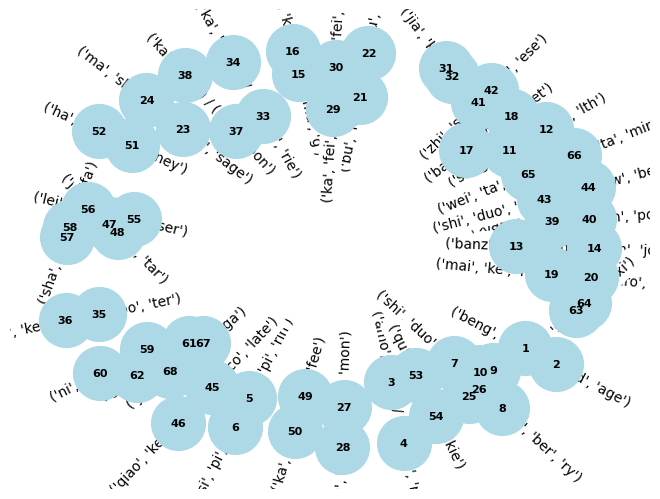

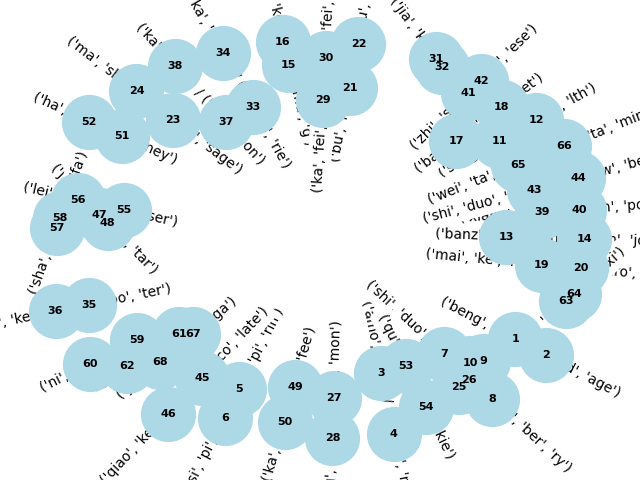

TypeError: 'NoneType' object is not iterable

In [5]:
## Attempt 4
from nltk.nltk_contrib.fst.fst import *
from tkinter import *
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
import networkx as nx
from IPython.display import Image as IPImage, display

class ChinglishFST(FST):
    def recognize(self, input_str):
        # Split the input string into individual Pinyin words
        pinyin_words = input_str

        # Use the transduce function to get the output for each Pinyin word
        output_words = [self.transduce(list(word)) for word in pinyin_words]

        # Combine the Pinyin words and their corresponding English translations
        result = [' '.join(f"{pinyin} --> {output}" for pinyin, output in zip(word, output_word)) for word, output_word in zip(pinyin_words, output_words)]

        print(f"Input: {' '.join(input_str)}")
        print("Intermediate Transductions:")
        for pinyin, output in zip(pinyin_words, output_words):
            print(f"{' '.join(pinyin)} --> {' '.join(output)}")


# Define the states and transitions
f = ChinglishFST('chinglish_transliteration')

# Function to add state and return the label
def add_state(label):
    f.add_state(label)
    return label

# Added arcs | Mapping of Pinyin to English Loan Word
f.add_arc(add_state('1'), add_state('2'), ('beng', 'dai'), ('band', 'age'))
f.add_arc(add_state('3'), add_state('4'), ('amo', 'niya'), ('ammo', 'nia'))
f.add_arc(add_state('5'), add_state('6'), ('asi', 'pi', 'lin'), ('as', 'pi', 'rin'))
f.add_arc(add_state('7'), add_state('8'), ('shi', 'duo', 'pi', 'li'), ('straw', 'ber', 'ry'))
f.add_arc(add_state('9'), add_state('10'), ('bei', 'guo'), ('ba', 'gel'))
f.add_arc(add_state('11'), add_state('12'), ('sang', 'na'), ('hea', 'lth'))
f.add_arc(add_state('13'), add_state('14'), ('banz', 'huo', 'qin'), ('ban', 'jo'))
f.add_arc(add_state('15'), add_state('16'), ('ma', 'ke', 'bei'), ('mu', 'g'))
f.add_arc(add_state('17'), add_state('18'), ('ba', 'lei'), ('bal', 'let'))
f.add_arc(add_state('19'), add_state('20'), ('mai', 'ke', 'feng'), ('mi', 'cro', 'phone'))
f.add_arc(add_state('21'), add_state('22'), ('bu', 'lu', 'si'), ('b', 'lu', 'es'))
f.add_arc(add_state('23'), add_state('24'), ('ma', 'sha', 'ji'), ('mas', 'sage'))
f.add_arc(add_state('25'), add_state('26'), ('ba', 'shi'), ('b', 'us'))
f.add_arc(add_state('27'), add_state('28'), ('ning', 'meng'), ('le', 'mon'))
f.add_arc(add_state('29'), add_state('30'), ('ka', 'fei', 'yin'), ('caf', 'fei', 'ne'))
f.add_arc(add_state('31'), add_state('32'), ('jia', 'ke'), ('jac', 'ket'))
f.add_arc(add_state('33'), add_state('34'), ('ka', 'lu', 'li'), ('ca', 'lo', 'rie'))
f.add_arc(add_state('35'), add_state('36'), ('su', 'ke', 'da'), ('scoo', 'ter'))
f.add_arc(add_state('37'), add_state('38'), ('ka', 'tong'), ('car', 'toon'))
f.add_arc(add_state('39'), add_state('40'), ('xiang', 'bo'), ('sham', 'poo'))
f.add_arc(add_state('41'), add_state('42'), ('zhi', 'shi'), ('che', 'ese'))
f.add_arc(add_state('43'), add_state('44'), ('shi', 'duo', 'pi', 'li'), ('straw', 'ber', 'ry'))
f.add_arc(add_state('45'), add_state('46'), ('qiao', 'ke', 'li'), ('cho', 'co', 'late'))
f.add_arc(add_state('47'), add_state('48'), ('ji', 'ta'), ('gui', 'tar'))
f.add_arc(add_state('49'), add_state('50'), ('ka', 'fei'), ('cof', 'fee'))
f.add_arc(add_state('51'), add_state('52'), ('ha', 'ni'), ('ho', 'ney'))
f.add_arc(add_state('53'), add_state('54'), ('qu', 'qi'), ('coo', 'kie'))
f.add_arc(add_state('55'), add_state('56'), ('lei', 'she'), ('la', 'ser'))
f.add_arc(add_state('57'), add_state('58'), ('sha', 'fa'), ('so', 'fa'))
f.add_arc(add_state('59'), add_state('60'), ('ni', 'long'), ('ny', 'lon'))
f.add_arc(add_state('61'), add_state('62'), ('ga', 'li'), ('cur', 'ry'))
f.add_arc(add_state('63'), add_state('64'), ('di', 'shi'), ('ta', 'xi'))
f.add_arc(add_state('65'), add_state('66'), ('wei', 'ta', 'ming'), ('vi', 'ta', 'min'))
f.add_arc(add_state('67'), add_state('68'), ('yu', 'jia'), ('yo', 'ga'))

# Set the initial state and final state
f.initial_state = '1'
f.set_final('68')

# Tkinter window for FST construction
window = Tk()
window.title("FST Construction")

# Text widget to display FST information
fst_info_text = Text(window, height=100, width=100)
fst_info_text.pack()

# Display the FST information in the Tkinter window
fst_info_text.insert(END, f.__str__())

# Draw the FST using networkx and matplotlib
G = nx.DiGraph()

for state in f.states():
    for arc_label in f._outgoing[state]:
        source = state
        target = f._dst[arc_label]
        input_str = f._in_string[arc_label]
        output_str = f._out_string[arc_label]
        G.add_edge(source, target, label=f"{input_str} / {output_str}")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=1500, font_size=8, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Save the graph to a file
graph_file_path = "fst_graph.png"
plt.savefig(graph_file_path)
plt.show()

# Display the saved image using PIL and IPython
img = Image.open(graph_file_path)
display(IPImage(graph_file_path))

# Test the FST with given inputs and save the mappings in the .dat file
test_inputs = ["beng dai", "amo niya", "asi pi lin"]

output_file_path = "Chinglish-trans.dat"

# Open the file in write mode
with open(output_file_path, 'w') as output_file:
    # Iterate through test inputs
    for input_str in test_inputs:
        # Use the recognize function to get the output
        output_str = f.recognize(list(input_str.split()))
        if output_str:
            output_file.write(f"{input_str} --> {' '.join(output_str)}\n")
        else:
            print(f"No output found for: {input_str}")

# Run the Tkinter main loop
window.mainloop()

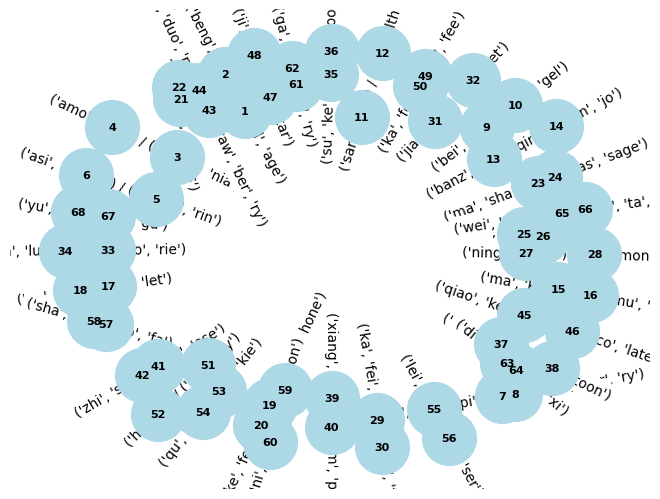

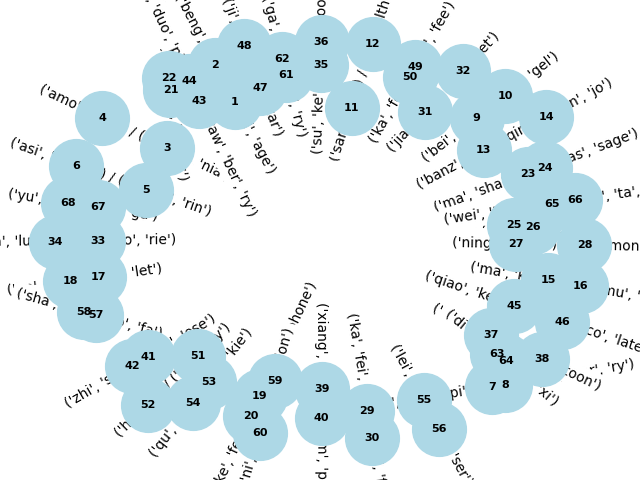

Input: ga
Intermediate Transductions:
ga --> None
Input: li
Intermediate Transductions:
li --> None
Test Input: ga 	 ['ga --> None']
Test Input: li 	 ['li --> None']
Input: ka
Intermediate Transductions:
ka --> None
Input: lu
Intermediate Transductions:
lu --> None
Input: li
Intermediate Transductions:
li --> None
Test Input: ka 	 ['ka --> None']
Test Input: lu 	 ['lu --> None']
Test Input: li 	 ['li --> None']
Input: wei
Intermediate Transductions:
wei --> None
Input: ta
Intermediate Transductions:
ta --> None
Input: ming
Intermediate Transductions:
ming --> None
Test Input: wei 	 ['wei --> None']
Test Input: ta 	 ['ta --> None']
Test Input: ming 	 ['ming --> None']
Input: ka
Intermediate Transductions:
ka --> None
Input: fei
Intermediate Transductions:
fei --> None
Test Input: ka 	 ['ka --> None']
Test Input: fei 	 ['fei --> None']
Input: lei
Intermediate Transductions:
lei --> None
Input: she
Intermediate Transductions:
she --> None
Test Input: lei 	 ['lei --> None']
Test Input: she

In [21]:
## produces graph + mapping content but in nltk window (not in .dat) 
from nltk.nltk_contrib.fst.fst import *  
from tkinter import *
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
import networkx as nx
import pydotplus 
import pydot
from IPython.display import Image as IPImage, display
import codecs

class ChinglishFST(FST):
    def recognize(self, input_str):
        # Split the input string into individual Pinyin words
        pinyin_words = input_str.split()

        # Use the transduce function to get the output for each Pinyin word
        output_words = [self.transduce(list(word)) for word in pinyin_words]

        # Combine the Pinyin words and their corresponding English translations
        result = [f"{pinyin} --> {output}" for pinyin, output in zip(pinyin_words, output_words)]

        print(f"Input: {input_str}")
        print("Intermediate Transductions:")
        for pinyin, output in zip(pinyin_words, output_words):
            print(f"{pinyin} --> {output}")

        return result
    
    def transduce(self, input_str):
        """
        Transduce the input Pinyin string to English.
        """
        current_state = self.initial_state
        output_str = []

        for symbol in input_str:
            # Find the outgoing arc for the current state and input symbol
            outgoing_arcs = self._outgoing.get(current_state, [])
            next_state = None
            output_symbol = None

            for arc in outgoing_arcs:
                if self._in_string[arc] == symbol:
                    next_state = self._dst[arc]
                    output_symbol = self._out_string[arc]
                    break

            if next_state is not None:
                current_state = next_state
                output_str.extend(output_symbol)
            else:
                # If no arc is found, return None
                return None

        return ''.join(output_str)

# Define the states and transitions
f = ChinglishFST('chinglish_transliteration')
state_labels = {}

# Function to add state and return the label
def add_state(label):
    state_labels[label] = True
    f.add_state(label)
    return label

# Added arcs | Mapping of Pinyin to English Loan Word
f.add_arc(add_state('1'), add_state('2'), ('beng', 'dai'), ('band', 'age'))
f.add_arc(add_state('3'), add_state('4'), ('amo', 'niya'), ('ammo', 'nia'))
f.add_arc(add_state('5'), add_state('6'), ('asi', 'pi', 'lin'), ('as', 'pi', 'rin'))
f.add_arc(add_state('7'), add_state('8'), ('shi', 'duo', 'pi', 'li'), ('straw', 'ber', 'ry'))
f.add_arc(add_state('9'), add_state('10'), ('bei', 'guo'), ('ba', 'gel'))
f.add_arc(add_state('11'), add_state('12'), ('sang', 'na'), ('hea', 'lth'))
f.add_arc(add_state('13'), add_state('14'), ('banz', 'huo', 'qin'), ('ban', 'jo'))
f.add_arc(add_state('15'), add_state('16'), ('ma', 'ke', 'bei'), ('mu', 'g'))
f.add_arc(add_state('17'), add_state('18'), ('ba', 'lei'), ('bal', 'let'))
f.add_arc(add_state('19'), add_state('20'), ('mai', 'ke', 'feng'), ('mi', 'cro', 'phone'))
f.add_arc(add_state('21'), add_state('22'), ('bu', 'lu', 'si'), ('b', 'lu', 'es'))
f.add_arc(add_state('23'), add_state('24'), ('ma', 'sha', 'ji'), ('mas', 'sage'))
f.add_arc(add_state('25'), add_state('26'), ('ba', 'shi'), ('b', 'us'))
f.add_arc(add_state('27'), add_state('28'), ('ning', 'meng'), ('le', 'mon'))
f.add_arc(add_state('29'), add_state('30'), ('ka', 'fei', 'yin'), ('caf', 'fei', 'ne'))
f.add_arc(add_state('31'), add_state('32'), ('jia', 'ke'), ('jac', 'ket'))
f.add_arc(add_state('33'), add_state('34'), ('ka', 'lu', 'li'), ('ca', 'lo', 'rie'))
f.add_arc(add_state('35'), add_state('36'), ('su', 'ke', 'da'), ('scoo', 'ter'))
f.add_arc(add_state('37'), add_state('38'), ('ka', 'tong'), ('car', 'toon'))
f.add_arc(add_state('39'), add_state('40'), ('xiang', 'bo'), ('sham', 'poo'))
f.add_arc(add_state('41'), add_state('42'), ('zhi', 'shi'), ('che', 'ese'))
f.add_arc(add_state('43'), add_state('44'), ('shi', 'duo', 'pi', 'li'), ('straw', 'ber', 'ry'))
f.add_arc(add_state('45'), add_state('46'), ('qiao', 'ke', 'li'), ('cho', 'co', 'late'))
f.add_arc(add_state('47'), add_state('48'), ('ji', 'ta'), ('gui', 'tar'))
f.add_arc(add_state('49'), add_state('50'), ('ka', 'fei'), ('cof', 'fee'))
f.add_arc(add_state('51'), add_state('52'), ('ha', 'ni'), ('ho', 'ney'))
f.add_arc(add_state('53'), add_state('54'), ('qu', 'qi'), ('coo', 'kie'))
f.add_arc(add_state('55'), add_state('56'), ('lei', 'she'), ('la', 'ser'))
f.add_arc(add_state('57'), add_state('58'), ('sha', 'fa'), ('so', 'fa'))
f.add_arc(add_state('59'), add_state('60'), ('ni', 'long'), ('ny', 'lon'))
f.add_arc(add_state('61'), add_state('62'), ('ga', 'li'), ('cur', 'ry'))
f.add_arc(add_state('63'), add_state('64'), ('di', 'shi'), ('ta', 'xi'))
f.add_arc(add_state('65'), add_state('66'), ('wei', 'ta', 'ming'), ('vi', 'ta', 'min'))
f.add_arc(add_state('67'), add_state('68'), ('yu', 'jia'), ('yo', 'ga'))

# Set the initial state and final state
f.initial_state = '1'
f.set_final('68')

# Tkinter window for FST construction
window = Tk()
window.title("FST Construction")

# Text widget to display FST information
fst_info_text = Text(window, height=100, width=100)
fst_info_text.pack()

# Display the FST information in the Tkinter window
fst_info_text.insert(END, f.__str__())

# Draw the FST using networkx and matplotlib
G = nx.DiGraph()

for state in f.states():
    for arc_label in f._outgoing[state]:
        source = state
        target = f._dst[arc_label]
        input_str = f._in_string[arc_label]
        output_str = f._out_string[arc_label]
        G.add_edge(source, target, label=f"{input_str} / {output_str}")
    
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=1500, font_size=8, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Save the graph to a file
graph_file_path = "fst_graph.png"
plt.savefig(graph_file_path)
plt.show()

# Display the saved image using PIL and IPython
img = Image.open(graph_file_path)
display(IPImage(graph_file_path))

# Run the Tkinter main loop
window.mainloop()

# Tests FST with given inputs and save mappings in the .dat file
test_inputs = ["ga li", "ka lu li", "wei ta ming", "ka fei", "lei she"]

output_file_path = "Chinglish-trans.dat"

# Opens file in write mode
with open(output_file_path, 'w') as output_file:
    # Iterate through test inputs
    for input_str in test_inputs:
        # Split the input into individual Pinyin words
        pinyin_words = input_str.split()

        # Uses the recognize function to get the output for each Pinyin word
        output_words = [f.recognize(word) for word in pinyin_words]

        # Writes each Pinyin word and its English output to the .dat file
        for pinyin, output in zip(pinyin_words, output_words):
            output_file.write(f"{pinyin} --> {output}\n")

            # Displays the test input and its recognition result in the nltk window
            result = output if output else "None"
            print(f"Test Input: {pinyin} \t {result}")

In [6]:
# PLAUSIBLE graph only [fails to find output mappings]
from nltk.nltk_contrib.fst.fst import *

class ChineseEnglishFST(FST):
    def check(self, input_str):
        current_state = self.initial_state
        output_sequence = []

        for symbol in input_str.split():
            arcs = self.transitions.get((current_state, symbol), [])
            if not arcs:
                print(f"No transition for symbol '{symbol}' at state {current_state}")
                break

            arc = arcs[0]  # Assumes a non-deterministic FST, takes first arc
            current_state = arc.nextstate
            output_sequence.append(arc.olabel)

            print(f"Transition: {current_state} --({symbol}/{arc.ilabel}:{arc.olabel})--> {arc.nextstate}")

        if current_state in self.states:
            print(f"Reached final state: {current_state}")
            return output_sequence
        else:
            print(f"Failed to reach final state. Current state: {current_state}")
            return None
        
def generate_mappings():
    pinyin_mappings = {}

    # Added mappings for individual Pinyin components
    individual_mappings = {
        "ga": "cur",
        "li": ["ry", "rie"],
        "ka": ["ca"],
        "lu": ["lo"],
       "wei": ["vi"],
        "ta": ["ta"],
      "ming": ["min"],
       "fei": ["fee"],
       "lei": ["la"],
       "she": ["ser"],
       }
    
    for key, value in individual_mappings.items():
        if isinstance(value, list):
            for i, sub_value in enumerate(value):
                pinyin_mappings[f"{key}_{i}"] = sub_value
        else:
            pinyin_mappings[key] = value

    # Added mappings for combined Pinyin
    combined_mappings = {
        "ga li": "cur ry",
        "ka lu li": "ca lo rie",
        "wei ta ming":"vi ta min",
        "ka fei": "cof fee",
        "lei she": "la ser",
        "beng dai": "band age",
        "amo ni ya": "am mo nia",
        "asi pi lin": "as pi rin",
        "bei guo": "ba gel",
        "ban zhuo qin": "b an jo",
        "ba lei": "bal let",
        "bu lu si": "b lu es",
        "ba shi": "b us",
        "ka fei yin": "caf fei ne",
        "ka tong": "car toon",
        "zhi shi": "che ese",
        "qiao ke li": "cho co late",
        "qu qi": "coo kie",
        "sha fa": "so fa",
        "tu si": "toa st",
        "de lu feng": "te le phone",
        "shi duo pi li": "st raw ber ry",
        "sang na": "heal th",
        "ma ke bei": "m u g",
        "mai ke feng": "mi cro phone",
        "ma sha ji": "mas sa ge",
        "ning meng": "le mon",
        "jia ke": "jac ket",
        "su ke da": "sc oo ter",
        "xiang bo": "sham poo",
        "ji ta": "gui tar",
        "ha ni": "ho ney",
        "ni long": "ny lon",
        "di shi": "ta xi",
        "yu jia": "yo ga"
    }
    pinyin_mappings.update(combined_mappings)

    return pinyin_mappings

def construct_fst(pinyin_mappings):
    fst = ChineseEnglishFST("chinese-english")

    # Adding states
    for i in range(len(pinyin_mappings) * 2 + 1):
        fst.add_state(str(i))

    # Initial State
    fst.initial_state = "0"

    # Final States
    for i in range(1, len(pinyin_mappings) * 2 + 1, 2):
        fst.set_final(str(i))

    # Adding arcs
    current_state = 0
    for pinyin, transl in pinyin_mappings.items():
        current_state += 1
        fst.add_arc(str(current_state - 1), str(current_state), pinyin, "")

        if isinstance(transl, list):
            for i, sub_transl in enumerate(transl):
                fst.add_arc(str(current_state), str(current_state + 1), f"{pinyin}_{i}", sub_transl)
                current_state += 1
        else:
            fst.add_arc(str(current_state), str(current_state + 1), "", transl)
            current_state += 1

    return fst

if __name__ == "__main__":
    mappings = generate_mappings()
    fst_instance = construct_fst(mappings)

    # Exporting to file
    output_file_path = "Chinglish-trans.dat"
    with open(output_file_path, "w") as file:
        for pinyin, transl in mappings.items():
            try:
                if " " in pinyin:
                    # Combined Pinyin form
                    combined_output = []
                    combined_parts = pinyin.split(" ")
                    for part in combined_parts:
                        output = fst_instance.check(part)
                        if output:
                            combined_output.extend(output)
                    file.write(f"{pinyin:50} {'-->':10} {' '.join(map(str, combined_output))}\n")
                else:
                    # Individual Pinyin form
                    output = fst_instance.check(pinyin)
                    if output:
                        file.write(f"{pinyin:50} {'-->':10} {' '.join(map(str, output))}\n")
                    else:
                        print(f"Failed to find: {pinyin}")
            except Exception as e:
                print(f"Failed to find: {pinyin}")

    # Show FST in Tkinter window
    FSTDisplay(fst_instance).cf.mainloop()

Failed to find: ga
Failed to find: li_0
Failed to find: li_1
Failed to find: ka_0
Failed to find: lu_0
Failed to find: wei_0
Failed to find: ta_0
Failed to find: ming_0
Failed to find: fei_0
Failed to find: lei_0
Failed to find: she_0
Failed to find: ga li
Failed to find: ka lu li
Failed to find: wei ta ming
Failed to find: ka fei
Failed to find: lei she
Failed to find: beng dai
Failed to find: amo ni ya
Failed to find: asi pi lin
Failed to find: bei guo
Failed to find: ban zhuo qin
Failed to find: ba lei
Failed to find: bu lu si
Failed to find: ba shi
Failed to find: ka fei yin
Failed to find: ka tong
Failed to find: zhi shi
Failed to find: qiao ke li
Failed to find: qu qi
Failed to find: sha fa
Failed to find: tu si
Failed to find: de lu feng
Failed to find: shi duo pi li
Failed to find: sang na
Failed to find: ma ke bei
Failed to find: mai ke feng
Failed to find: ma sha ji
Failed to find: ning meng
Failed to find: jia ke
Failed to find: su ke da
Failed to find: xiang bo
Failed to fi

In [4]:
from nltk.nltk_contrib.fst.fst import *

class ChineseEnglishFST(FST):
    def check(self, input_str):
        """
        Runs the input Pinyin with the FST and returns the transliteration if found else return false
        @param input_str [str]: Input Pinyin string that will run through the FST
        @return [str] or [False]: The transliteration of the input string or False if not found
        """
        output = self.transduce(input_str)
        if output:
            msg = f"{input_str:50} {'-->':10} {''.join(output)}"
            print(msg)
            return msg
        else:
            print(input_str)
            raise Exception("No output found")
            return False

fst = ChineseEnglishFST("chinese-english")

# Define mappings for Chinese-English transliterations
pinyin_mappings = {
    "ga": "cur",
    "kaluli": "calorie",
    "weitaming": "vitamin",
    "kafei": "coffee",
    "leishe": "laser",
}

# Adding states
for i in range(len(pinyin_mappings) + 1):
    fst.add_state(str(i))

# Initial State
fst.initial_state = "0"

# Final States
for i in range(len(pinyin_mappings)):
    fst.set_final(str(i + 1))

# Adding arcs
current_state = 0
for pinyin, transliteration in pinyin_mappings.items():
    current_state += 1
    fst.add_arc(str(current_state - 1), str(current_state), pinyin, transliteration)

# Exporting to file
output_file_path = "Chinese-Eng-trans.dat"
with open(output_file_path, "w") as file:
    for pinyin, transliteration in pinyin_mappings.items():
        check = fst.check(pinyin)
        if not check:
            print("Failed to find:", pinyin)
        else:
            file.write(f"{check}\n")

# Show FST in Tkinter window
FSTDisplay(fst).cf.mainloop()

ga                                                 -->        cur
kaluli


Exception: No output found

In [3]:
## Latest Attempts 

from nltk.nltk_contrib.fst.fst import *

class ChineseEnglishFST(FST):
    def recognize(self, iput, oput):
        self.inp = list(iput)
        self.outp = list(oput)

        # Use the transduce function to get the output
        transduced_output = list(self.transduce(list(iput)))

        # Check if the transduced output matches the expected output
        if transduced_output == self.outp:
            return True
        else:
            return False

# Define your FST
f = ChineseEnglishFST('chinese_english_transducer')
# Add states for each word pair
f.add_state('start')
f.add_state('end')

# Define transitions for each word pair
transitions = [
    ('start', 'gali', 'cur ry', 'start'),
    ('start', 'kaluli', 'ca lo rie', 'start'),
    ('start', 'weitaming', 'vi ta min', 'start'),
    ('start', 'kafei', 'cof fee', 'start'),
    ('start', 'leishe', 'la ser', 'start'),
    ('start', 'bengdai', 'band age', 'start'),
    ('start', 'amoniya', 'am mo nia', 'start'),
    ('start', 'asipilin', 'as pi rin', 'start'),
    ('start', 'beiguo', 'ba gel', 'start'),
    ('start', 'banzhuoqin', 'ban jo', 'start'),
    ('start', 'balei', 'bal let', 'start'),
    ('start', 'bulusi', 'blu es', 'start'),
    ('start', 'bashi', 'b us', 'start'),
    ('start', 'kafeiyin', 'caf fei ne', 'start'),
    ('start', 'katong', 'car toon', 'start'),
    ('start', 'zhishi', 'che ese', 'start'),
    ('start', 'qiaokeli', 'cho co late', 'start'),
    ('start', 'quqi', 'coo kie', 'start'),
    ('start', 'shafa', 'so fa', 'start'),
    ('start', 'tusi', 'toa st', 'start'),
    ('start', 'delufeng', 'te le phone', 'start'),
    ('start', 'shiduopili', 'straw ber ry', 'start'),
    ('start', 'sangna', 'heal th', 'start'),
    ('start', 'makebei', 'm ug', 'start'),
    ('start', 'maikefeng', 'mi cro phone', 'start'),
    ('start', 'mashaji', 'mas sage', 'start'),
    ('start', 'ningmeng', 'le mon', 'start'),
    ('start', 'jiake', 'jac ket', 'start'),
    ('start', 'sukeda', 'scoo ter', 'start'),
    ('start', 'xiangbo', 'sham poo', 'start'),
    ('start', 'jita', 'gui tar', 'start'),
    ('start', 'hani', 'ho ney', 'start'),
    ('start', 'nilong', 'ny lon', 'start'),
    ('start', 'dishi', 'ta xi', 'start'),
    ('start', 'yujia', 'yo ga', 'start'),
    ('start', '', '', 'end'),  # epsilon transition to end state
]

for transition in transitions:
    f.add_arc(*transition)

# Set the start state and end state
f.set_start('start')
f.set_final('end')

# Input and expected output
inp = "gali"
outp = "curry"

print("Input:", inp)

# Use the recognize function defined in myFST
if f.recognize(inp, outp):
    # Split the input and output into words
    transduced_input = list(inp)
    transduced_output = list(f.transduce(list(inp)))

    # Identify boundaries between words
    pairs = []
    current_pair = []
    for pinyin, english in zip(transduced_input, transduced_output):
        if pinyin == '' and current_pair:
            # End of a word, add the pair to the list
            pairs.append(" ".join(current_pair))
            current_pair = []
        else:
            # Continue building the current pair
            current_pair.extend([pinyin, english])

    print(" ".join(pairs))
    print("Accept")
else:
    print("Reject")

disp = FSTDisplay(f)

ValueError: Unknown state label 'gali'

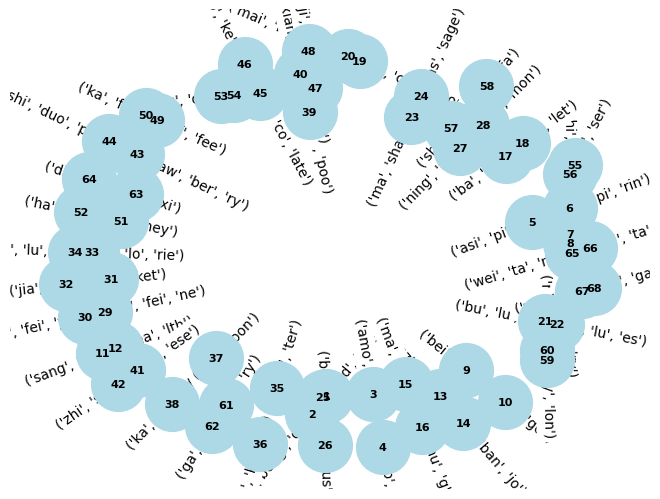

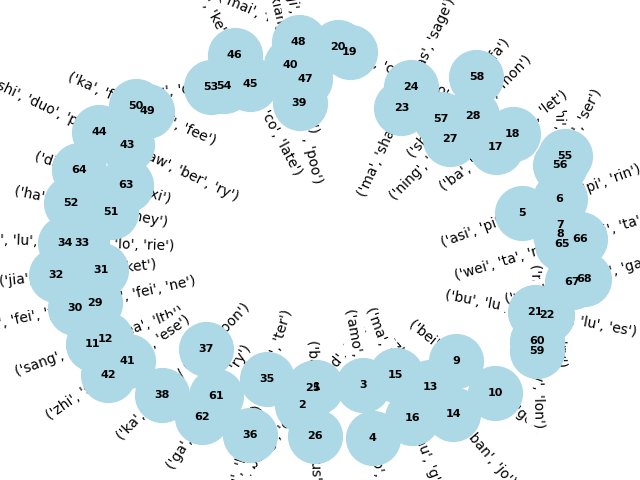

No matching arc for symbol 'li' in state 1
Current state: 1
Input string: ga li
Output string so far: 
Test Input: ga li 	 None
No matching arc for symbol 'li' in state 1
Current state: 1
Input string: ka lu li
Output string so far: 
Test Input: ka lu li 	 None
No matching arc for symbol 'ming' in state 1
Current state: 1
Input string: wei ta ming
Output string so far: 
Test Input: wei ta ming 	 None
No matching arc for symbol 'fei' in state 1
Current state: 1
Input string: ka fei
Output string so far: 
Test Input: ka fei 	 None
No matching arc for symbol 'she' in state 1
Current state: 1
Input string: lei she
Output string so far: 
Test Input: lei she 	 None
Test Input: beng dai 	 bandage
No matching arc for symbol 'ni' in state 1
Current state: 1
Input string: ha ni
Output string so far: 
Test Input: ha ni 	 None
No matching arc for symbol 'niya' in state 1
Current state: 1
Input string: amo niya
Output string so far: 
Test Input: amo niya 	 None


In [2]:
### Latest attempts (almost there)
from nltk.nltk_contrib.fst.fst import *  
from tkinter import *
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
import networkx as nx
import pydotplus 
import pydot
from IPython.display import Image as IPImage, display
import codecs

class ChinglishFST(FST):
    def recognize(self, input_str):
        # Use the transduce function to get the output for the entire input
        output = self.transduce(list(input_str.split()))

        return output
    
    def transduce(self, input_str):
        """
        Transduce the input Pinyin string to English.
        """
        current_state = self.initial_state
        output_str = []

        for symbol in input_str:
            # Find the outgoing arc for the current state and input symbol
            outgoing_arcs = self._outgoing.get(current_state, [])
            next_state = None
            output_symbol = None

        for arc in outgoing_arcs:
            # Check if the input symbol is in the list of Pinyin symbols
            if symbol in self._in_string[arc]:
                next_state = self._dst[arc]
                output_symbol = self._out_string[arc]
                break

        if next_state is not None:
            current_state = next_state
            output_str.extend(output_symbol)
        else:
            # If no arc is found, print some debug information
            print(f"No matching arc for symbol '{symbol}' in state {current_state}")
            print(f"Current state: {current_state}")
            print(f"Input string: {' '.join(input_str)}")
            print(f"Output string so far: {''.join(output_str)}")
            return None

        return ''.join(output_str)
    
# Define the states and transitions
f = ChinglishFST('chinglish_transliteration')
state_labels = {}

# Function to add state and return the label
def add_state(label):
    state_labels[label] = True
    f.add_state(label)
    return label

# Added arcs | Mapping of Pinyin to English Loan Word
f.add_arc(add_state('1'), add_state('2'), ('beng', 'dai'), ('band', 'age'))
f.add_arc(add_state('3'), add_state('4'), ('amo', 'niya'), ('ammo', 'nia'))
f.add_arc(add_state('5'), add_state('6'), ('asi', 'pi', 'lin'), ('as', 'pi', 'rin'))
f.add_arc(add_state('7'), add_state('8'), ('shi', 'duo', 'pi', 'li'), ('straw', 'ber', 'ry'))
f.add_arc(add_state('9'), add_state('10'), ('bei', 'guo'), ('ba', 'gel'))
f.add_arc(add_state('11'), add_state('12'), ('sang', 'na'), ('hea', 'lth'))
f.add_arc(add_state('13'), add_state('14'), ('banz', 'huo', 'qin'), ('ban', 'jo'))
f.add_arc(add_state('15'), add_state('16'), ('ma', 'ke', 'bei'), ('mu', 'g'))
f.add_arc(add_state('17'), add_state('18'), ('ba', 'lei'), ('bal', 'let'))
f.add_arc(add_state('19'), add_state('20'), ('mai', 'ke', 'feng'), ('mi', 'cro', 'phone'))
f.add_arc(add_state('21'), add_state('22'), ('bu', 'lu', 'si'), ('b', 'lu', 'es'))
f.add_arc(add_state('23'), add_state('24'), ('ma', 'sha', 'ji'), ('mas', 'sage'))
f.add_arc(add_state('25'), add_state('26'), ('ba', 'shi'), ('b', 'us'))
f.add_arc(add_state('27'), add_state('28'), ('ning', 'meng'), ('le', 'mon'))
f.add_arc(add_state('29'), add_state('30'), ('ka', 'fei', 'yin'), ('caf', 'fei', 'ne'))
f.add_arc(add_state('31'), add_state('32'), ('jia', 'ke'), ('jac', 'ket'))
f.add_arc(add_state('33'), add_state('34'), ('ka', 'lu', 'li'), ('ca', 'lo', 'rie'))
f.add_arc(add_state('35'), add_state('36'), ('su', 'ke', 'da'), ('scoo', 'ter'))
f.add_arc(add_state('37'), add_state('38'), ('ka', 'tong'), ('car', 'toon'))
f.add_arc(add_state('39'), add_state('40'), ('xiang', 'bo'), ('sham', 'poo'))
f.add_arc(add_state('41'), add_state('42'), ('zhi', 'shi'), ('che', 'ese'))
f.add_arc(add_state('43'), add_state('44'), ('shi', 'duo', 'pi', 'li'), ('straw', 'ber', 'ry'))
f.add_arc(add_state('45'), add_state('46'), ('qiao', 'ke', 'li'), ('cho', 'co', 'late'))
f.add_arc(add_state('47'), add_state('48'), ('ji', 'ta'), ('gui', 'tar'))
f.add_arc(add_state('49'), add_state('50'), ('ka', 'fei'), ('cof', 'fee'))
f.add_arc(add_state('51'), add_state('52'), ('ha', 'ni'), ('ho', 'ney'))
f.add_arc(add_state('53'), add_state('54'), ('qu', 'qi'), ('coo', 'kie'))
f.add_arc(add_state('55'), add_state('56'), ('lei', 'she'), ('la', 'ser'))
f.add_arc(add_state('57'), add_state('58'), ('sha', 'fa'), ('so', 'fa'))
f.add_arc(add_state('59'), add_state('60'), ('ni', 'long'), ('ny', 'lon'))
f.add_arc(add_state('61'), add_state('62'), ('ga', 'li'), ('cur', 'ry'))
f.add_arc(add_state('63'), add_state('64'), ('di', 'shi'), ('ta', 'xi'))
f.add_arc(add_state('65'), add_state('66'), ('wei', 'ta', 'ming'), ('vi', 'ta', 'min'))
f.add_arc(add_state('67'), add_state('68'), ('yu', 'jia'), ('yo', 'ga'))

# Set the initial state and final state
f.initial_state = '1'
f.set_final('68')

# Tkinter window for FST construction
window = Tk()
window.title("FST Construction")

# Text widget to display FST information
fst_info_text = Text(window, height=80, width=90)
fst_info_text.pack()

# Display the FST information in the Tkinter window
fst_info_text.insert(END, f.__str__())

# Draw the FST using networkx and matplotlib
G = nx.DiGraph()

for state in f.states():
    for arc_label in f._outgoing[state]:
        source = state
        target = f._dst[arc_label]
        input_str = f._in_string[arc_label]
        output_str = f._out_string[arc_label]
        G.add_edge(source, target, label=f"{input_str} / {output_str}")
    
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=1500, font_size=8, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Save the graph to a file
graph_file_path = "fst_graph.png"
plt.savefig(graph_file_path)
plt.show()

# Display the saved image using PIL and IPython
img = Image.open(graph_file_path)
display(IPImage(graph_file_path))

# Run the Tkinter main loop
window.mainloop()

# Tests FST with given inputs and save mappings in the .dat file
test_inputs = ["ga li", "ka lu li", "wei ta ming", "ka fei", "lei she", "beng dai", "ha ni", "amo niya"]

output_file_path = "Chinglish-trans.dat"

# Opens file in write mode
with open(output_file_path, 'w') as output_file:
    # Iterate through test inputs
    for input_str in test_inputs:
        # Uses the recognize function to get the output for the entire input
        output = f.recognize(input_str)

        # Writes the entire input and its English output to the .dat file
        output_file.write(f"{input_str} --> {output}\n")

        # Displays the test input and its recognition result in the nltk window
        result = output if output else "None"
        print(f"Test Input: {input_str} \t {result}")

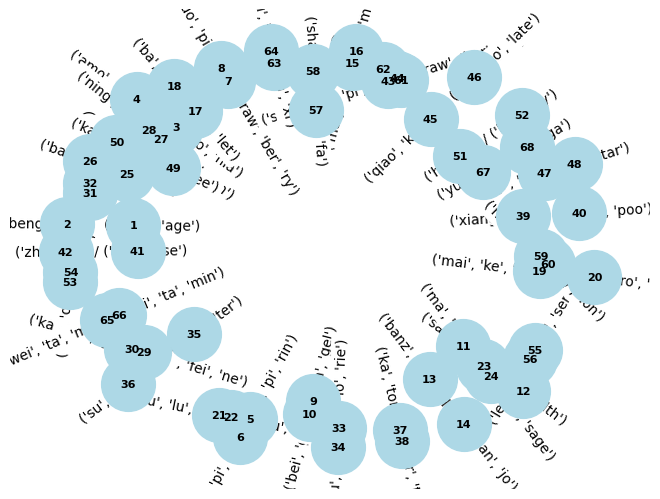

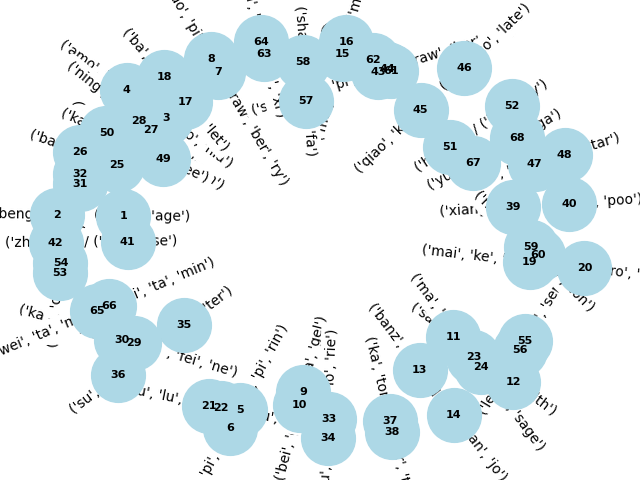

No matching arc for symbol 'ga' in state 1
Current state: 1
Input string: ga li
Output string so far: 
Test Input: ga li 	 None
No matching arc for symbol 'ka' in state 1
Current state: 1
Input string: ka lu li
Output string so far: 
Test Input: ka lu li 	 None
No matching arc for symbol 'wei' in state 1
Current state: 1
Input string: wei ta ming
Output string so far: 
Test Input: wei ta ming 	 None
No matching arc for symbol 'ka' in state 1
Current state: 1
Input string: ka fei
Output string so far: 
Test Input: ka fei 	 None
No matching arc for symbol 'lei' in state 1
Current state: 1
Input string: lei she
Output string so far: 
Test Input: lei she 	 None
No matching arc for symbol 'dai' in state 2
Current state: 2
Input string: beng dai
Output string so far: bandage
Test Input: beng dai 	 None
No matching arc for symbol 'ha' in state 1
Current state: 1
Input string: ha ni
Output string so far: 
Test Input: ha ni 	 None
No matching arc for symbol 'amo' in state 1
Current state: 1
Inp

In [1]:
## Latest attempts #2 
## produces graph + mapping content but in nltk window (not in .dat) 
from nltk.nltk_contrib.fst.fst import *  
from tkinter import *
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
import networkx as nx
from IPython.display import Image as IPImage, display


class ChinglishFST(FST):
    def recognize(self, input_str):
        # Use the transduce function to get the output for the entire input
        output = self.transduce(list(input_str.split()))

        return output
    
    def transduce(self, input_str):
        """
        Transduce the input Pinyin string to English.
        """
        current_state = self.initial_state
        output_str = []

        for symbol in input_str:
            # Find the outgoing arc for the current state and input symbol
            outgoing_arcs = self._outgoing.get(current_state, [])
            possible_arcs = []
            
            for arc in outgoing_arcs:
                # Checks if input matches the Pinyin symbol in the arc
                 if symbol == self._in_string[arc][0]:
                    possible_arcs.append(arc)

            if not possible_arcs:
            # If no matching arc is found, print debug information
                print(f"No matching arc for symbol '{symbol}' in state {current_state}")
                print(f"Current state: {current_state}")
                print(f"Input string: {' '.join(input_str)}")
                print(f"Output string so far: {''.join(output_str)}")
                return None
        
            # If multiple possible arcs, chooses one with the longest input string
            chosen_arc = max(possible_arcs, key=lambda arc: len(self._in_string[arc]))

            # Update the current state and output string
            current_state = self._dst[chosen_arc]
            output_str.extend(self._out_string[chosen_arc])
        
        # After processing the entire input, update the current state
        self.initial_state = current_state

        return ''.join(output_str)
    
# Define the states and transitions
f = ChinglishFST('chinglish_transliteration')
state_labels = {}

# Function to add state and return the label
def add_state(label):
    state_labels[label] = True
    f.add_state(label)
    return label

# Added arcs | Mapping of Pinyin to English Loan Word
f.add_arc(add_state('1'), add_state('2'), ('beng', 'dai'), ('band', 'age'))
f.add_arc(add_state('3'), add_state('4'), ('amo', 'niya'), ('ammo', 'nia'))
f.add_arc(add_state('5'), add_state('6'), ('asi', 'pi', 'lin'), ('as', 'pi', 'rin'))
f.add_arc(add_state('7'), add_state('8'), ('shi', 'duo', 'pi', 'li'), ('straw', 'ber', 'ry'))
f.add_arc(add_state('9'), add_state('10'), ('bei', 'guo'), ('ba', 'gel'))
f.add_arc(add_state('11'), add_state('12'), ('sang', 'na'), ('hea', 'lth'))
f.add_arc(add_state('13'), add_state('14'), ('banz', 'huo', 'qin'), ('ban', 'jo'))
f.add_arc(add_state('15'), add_state('16'), ('ma', 'ke', 'bei'), ('mu', 'g'))
f.add_arc(add_state('17'), add_state('18'), ('ba', 'lei'), ('bal', 'let'))
f.add_arc(add_state('19'), add_state('20'), ('mai', 'ke', 'feng'), ('mi', 'cro', 'phone'))
f.add_arc(add_state('21'), add_state('22'), ('bu', 'lu', 'si'), ('b', 'lu', 'es'))
f.add_arc(add_state('23'), add_state('24'), ('ma', 'sha', 'ji'), ('mas', 'sage'))
f.add_arc(add_state('25'), add_state('26'), ('ba', 'shi'), ('b', 'us'))
f.add_arc(add_state('27'), add_state('28'), ('ning', 'meng'), ('le', 'mon'))
f.add_arc(add_state('29'), add_state('30'), ('ka', 'fei', 'yin'), ('caf', 'fei', 'ne'))
f.add_arc(add_state('31'), add_state('32'), ('jia', 'ke'), ('jac', 'ket'))
f.add_arc(add_state('33'), add_state('34'), ('ka', 'lu', 'li'), ('ca', 'lo', 'rie'))
f.add_arc(add_state('35'), add_state('36'), ('su', 'ke', 'da'), ('scoo', 'ter'))
f.add_arc(add_state('37'), add_state('38'), ('ka', 'tong'), ('car', 'toon'))
f.add_arc(add_state('39'), add_state('40'), ('xiang', 'bo'), ('sham', 'poo'))
f.add_arc(add_state('41'), add_state('42'), ('zhi', 'shi'), ('che', 'ese'))
f.add_arc(add_state('43'), add_state('44'), ('shi', 'duo', 'pi', 'li'), ('straw', 'ber', 'ry'))
f.add_arc(add_state('45'), add_state('46'), ('qiao', 'ke', 'li'), ('cho', 'co', 'late'))
f.add_arc(add_state('47'), add_state('48'), ('ji', 'ta'), ('gui', 'tar'))
f.add_arc(add_state('49'), add_state('50'), ('ka', 'fei'), ('cof', 'fee'))
f.add_arc(add_state('51'), add_state('52'), ('ha', 'ni'), ('ho', 'ney'))
f.add_arc(add_state('53'), add_state('54'), ('qu', 'qi'), ('coo', 'kie'))
f.add_arc(add_state('55'), add_state('56'), ('lei', 'she'), ('la', 'ser'))
f.add_arc(add_state('57'), add_state('58'), ('sha', 'fa'), ('so', 'fa'))
f.add_arc(add_state('59'), add_state('60'), ('ni', 'long'), ('ny', 'lon'))
f.add_arc(add_state('61'), add_state('62'), ('ga', 'li'), ('cur', 'ry'))
f.add_arc(add_state('63'), add_state('64'), ('di', 'shi'), ('ta', 'xi'))
f.add_arc(add_state('65'), add_state('66'), ('wei', 'ta', 'ming'), ('vi', 'ta', 'min'))
f.add_arc(add_state('67'), add_state('68'), ('yu', 'jia'), ('yo', 'ga'))

# Set the initial state and final state
f.initial_state = '1'
f.set_final('68')

# Tkinter window for FST construction
window = Tk()
window.title("FST Construction")

# Text widget to display FST information
fst_info_text = Text(window, height=80, width=90)
fst_info_text.pack()

# Display the FST information in the Tkinter window
fst_info_text.insert(END, f.__str__())

# Draw the FST using networkx and matplotlib
G = nx.DiGraph()

for state in f.states():
    for arc_label in f._outgoing[state]:
        source = state
        target = f._dst[arc_label]
        input_str = f._in_string[arc_label]
        output_str = f._out_string[arc_label]
        G.add_edge(source, target, label=f"{input_str} / {output_str}")
    
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=1500, font_size=8, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Save the graph to a file
graph_file_path = "fst_graph.png"
plt.savefig(graph_file_path)
plt.show()

# Display the saved image using PIL and IPython
img = Image.open(graph_file_path)
display(IPImage(graph_file_path))

# Run the Tkinter main loop
window.mainloop()

# Tests FST with given inputs and save mappings in the .dat file
test_inputs = ["ga li", "ka lu li", "wei ta ming", "ka fei", "lei she", "beng dai", "ha ni", "amo niya"]

output_file_path = "Chinglish-trans.dat"

# Opens file in write mode
with open(output_file_path, 'w') as output_file:
    # Iterate through test inputs
    for input_str in test_inputs:
        # Uses the recognize function to get the output for the entire input
        output = f.recognize(input_str)

        # Writes the entire input and its English output to the .dat file
        output_file.write(f"{input_str} --> {output}\n")

        # Displays the test input and its recognition result in the nltk window
        result = output if output else "None"
        print(f"Test Input: {input_str} \t {result}")

cur
ry
ca lo rie
vi ta min
cof fee
la ser
band age
am mo ni a
a s pi rin
ba gel
b an jo
bal let
b lu es
b us
caf fei ne
car toon
che ese
cho co late
coo kie
so fa
toa st
te le phone
st raw ber ry
heal th
m u g
mi cro phone
mas sa ge
le mon
jac ket
sc oo ter
sham poo
gui tar
ho ney
ny lon
ta xi
yo ga


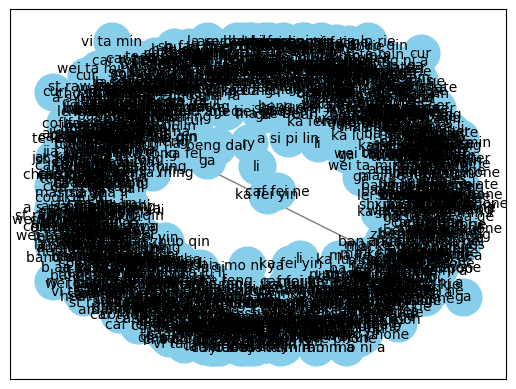

In [23]:
## Latest Attempts (.dat file outputs work, workin on fst construction)
from nltk.nltk_contrib.fst.fst import *
from tkinter import *
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
import networkx as nx
from IPython.display import Image as IPImage, display

class ChinglishFST(FST):
    def __init__(self):
        self.mapping = {i: {} for i in range(1, 5)}
        self.output_file = open("Chinglish-trans.dat", "w")

        # Tkinter window for FST construction
        self.window = Tk()
        self.window.title("Chinglish FST Construction")
        
        self.canvas = Canvas(self.window, width=800, height=400)
        self.canvas.pack()
        
        self.graph = nx.DiGraph()

    def add_syllables(self, syllables, translation):
        self.mapping[len(syllables.split())][syllables] = translation

    def get_syllables(self, syllables):
        return self.mapping[len(syllables.split())][syllables]

    def _extract_syllables(self, text):
        if len(text.split()) == 1:
            return text.strip()

        for i in range(4, 0, -1):
            for j in range(len(text.split()) - 1):
                span = ' '.join(text.split()[j:j + i])
                if span in self.mapping[i] and text.index(span) == 0:
                    return span

    def get_chains(self, text):
        chains = []

        while text:
            chain = self._extract_syllables(text)

            if chain:
                text = text.replace(chain, '', 1).strip()
                chains.append(chain)

        return chains

    def translate_chains(self, chains):
        new = []

        for chain in chains:
            new.append(self.get_syllables(chain))

        return ' '.join(new)

    def translate(self, text):
        chains = self.get_chains(text)
        result = self.translate_chains(chains)

        # Write to output file
        self.output_file.write(f"{text} --> {result}\n")

        # Update Tkinter FST construction
        self._update_fst_construction(text, result)

        return result

    def _update_fst_construction(self, input_text, output_text):
        self.graph.add_node(input_text)
        self.graph.add_node(output_text)
        self.graph.add_edge(input_text, output_text)

        pos = nx.spring_layout(self.graph)
        nx.draw_networkx_nodes(self.graph, pos, node_size=700, node_color='skyblue')
        nx.draw_networkx_edges(self.graph, pos, width=1.0, alpha=0.5, edge_color='black')

        labels = {}
        for node, label in zip(self.graph.nodes(), self.graph.nodes()):
            labels[node] = label

        nx.draw_networkx_labels(self.graph, pos, labels, font_size=10)

        img = ImageTk.PhotoImage(Image.open("fst_graph.png"))
        self.canvas.create_image(20, 20, anchor=NW, image=img)

    def close_output_file(self):
        self.output_file.close()

# Create an instance of the translator
translator = ChinglishFST()

# Added syllables and translations
translator.add_syllables('ga', 'cur')
translator.add_syllables('li', 'ry')
translator.add_syllables('ka', 'ca')
translator.add_syllables('lu', 'lo')
translator.add_syllables('lu li', 'lo rie')
translator.add_syllables('wei ta ming', 'vi ta min') 
translator.add_syllables('ka fei', 'cof fee')
translator.add_syllables('beng dai', 'band age')
translator.add_syllables('a mo ni ya', 'am mo ni a')
translator.add_syllables('a si pi lin', 'a s pi rin')
translator.add_syllables('bei guo', 'ba gel') 
translator.add_syllables('ban zhuo qin', 'b an jo') 
translator.add_syllables('ba lei', 'bal let')
translator.add_syllables('bu lu si', 'b lu es') 
translator.add_syllables('ba shi', 'b us') 
translator.add_syllables('ka fei yin', 'caf fei ne')
translator.add_syllables('ka tong', 'car toon') 
translator.add_syllables('zhi shi', 'che ese') 
translator.add_syllables('qiao ke li', 'cho co late') 
translator.add_syllables('qu qi', 'coo kie') 
translator.add_syllables('sha fa', 'so fa') 
translator.add_syllables('tu si', 'toa st') 
translator.add_syllables('de lu feng', 'te le phone') 
translator.add_syllables('shi duo pi li', 'st raw ber ry')
translator.add_syllables('sang na', 'heal th') 
translator.add_syllables('ma ke bei', 'm u g') 
translator.add_syllables('mai ke feng', 'mi cro phone') 
translator.add_syllables('ma sha ji', 'mas sa ge')
translator.add_syllables('ning meng', 'le mon') 
translator.add_syllables('jia ke', 'jac ket') 
translator.add_syllables('su ke da', 'sc oo ter') 
translator.add_syllables('xiang bo', 'sham poo') 
translator.add_syllables('ji ta', 'gui tar') 
translator.add_syllables('ha ni', 'ho ney') 
translator.add_syllables('lei she', 'la ser') 
translator.add_syllables('ni long', 'ny lon') 
translator.add_syllables('di shi', 'ta xi') 
translator.add_syllables('yu jia', 'yo ga') 

# Test Inputs (Figure 1)
print(translator.translate("ga"))          # cur
print(translator.translate("li"))          # ry
print(translator.translate("ka lu li"))    # ca lo rie
print(translator.translate("wei ta ming")) # vi ta min
print(translator.translate("ka fei"))      # cof fee 
print(translator.translate("lei she"))     # la ser

# Test Inputs (Rest of all mappings)
print(translator.translate("beng dai"))    # band age
print(translator.translate("a mo ni ya"))  # am mo ni a
print(translator.translate("a si pi lin")) # a s pi rin
print(translator.translate("bei guo"))     # ba gel 
print(translator.translate("ban zhuo qin"))
print(translator.translate("ba lei"))
print(translator.translate("bu lu si"))
print(translator.translate("ba shi"))
print(translator.translate("ka fei yin"))
print(translator.translate("ka tong"))
print(translator.translate("zhi shi"))
print(translator.translate("qiao ke li"))
print(translator.translate("qu qi"))
print(translator.translate("sha fa"))
print(translator.translate("tu si"))
print(translator.translate("de lu feng"))
print(translator.translate("shi duo pi li"))
print(translator.translate("sang na"))
print(translator.translate("ma ke bei"))
print(translator.translate("mai ke feng"))
print(translator.translate("ma sha ji"))
print(translator.translate("ning meng"))
print(translator.translate("jia ke"))
print(translator.translate("su ke da"))
print(translator.translate("xiang bo"))
print(translator.translate("ji ta"))
print(translator.translate("ha ni"))
print(translator.translate("ni long"))
print(translator.translate("di shi"))
print(translator.translate("yu jia"))

# Close output file
translator.close_output_file()

# Tkinter mainloop
translator.window.mainloop()

In [ ]:
## Latest Attempts (.dat file all input-output mappings printed + graph outputed (doesnt use NLTK package))
from nltk.nltk_contrib.fst.fst import *
from nltk.draw.util import *
from tkinter import *
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
import networkx as nx
from IPython.display import Image as IPImage, display
import graphviz

class ChinglishFST(FST):
    def __init__(self):
        self.mapping = {i: {} for i in range(1, 5)}
        self.output_file = open("Chinglish-trans.dat", "w")

        # Tkinter window for FST construction
        self.window = Tk()
        self.window.title("Chinglish FST Construction")
        
        self.canvas = Canvas(self.window, width=1000, height=600)
        self.canvas.pack()
        
        self.graph = nx.DiGraph()
        
        # Unique state label  
        self.state_counter = 0
        
        # Root state
        self.root_state = "li"
        self.graph.add_node(self.root_state, label=f"Root")

    def add_syllables(self, syllables, translation):
        self.mapping[len(syllables.split())][syllables] = translation

    def get_syllables(self, syllables):
        return self.mapping[len(syllables.split())][syllables]

    def _extract_syllables(self, text):
        if len(text.split()) == 1:
            return text.strip()

        for i in range(4, 0, -1):
            for j in range(len(text.split()) - 1):
                span = ' '.join(text.split()[j:j + i])
                if span in self.mapping[i] and text.index(span) == 0:
                    return span

    def get_chains(self, text):
        chains = []

        while text:
            chain = self._extract_syllables(text)

            if chain:
                text = text.replace(chain, '', 1).strip()
                chains.append(chain)

        return chains

    def translate_chains(self, chains):
        new = []

        for chain in chains:
            new.append(self.get_syllables(chain))

        return ' '.join(new)

    def translate(self, text):
        chains = self.get_chains(text)
        result = self.translate_chains(chains)

        # Write to output file
        self.output_file.write(f"{text} --> {result}\n")

        # Update Tkinter FST construction
        self._update_fst_construction(text, result)

        return result

    def _update_fst_construction(self, input_text, output_text):
        # Connected root state
        if input_text != "li" and not self.graph.has_edge("li", input_text):
            self.graph.add_edge("li", input_text, label=input_text)
            
        if input_text not in self.graph.nodes():
            self.graph.add_node(input_text, label=f"q{self.state_counter}")
            self.state_counter += 1

        if output_text not in self.graph.nodes():
            self.graph.add_node(output_text, label=f"q{self.state_counter}")
            self.state_counter += 1

        if not self.graph.has_edge(input_text, output_text):
            self.graph.add_edge(input_text, output_text, label=output_text)

        self._draw_fst_automaton()
        
    def _draw_fst_automaton(self):
        # directed graph using graphviz for visualization
        dot = graphviz.Digraph(comment='Chinglish FST')

        for node, data in self.graph.nodes(data=True):
            label = data.get('label', '')  # empty string if 'label' isnt present
            dot.node(label, label=node)

        for edge in self.graph.edges(data=True):
            dot.edge(str(edge[0]), str(edge[1]), label=edge[2]['label'])

        # graph saved as png
        dot.render('fst_graph', format='png', cleanup=True)

        # graph display in tkinter window 
        img = ImageTk.PhotoImage(Image.open("fst_graph.png"))
        self.canvas.create_image(20, 20, anchor=NW, image=img)
        self.canvas.update()

    def close_output_file(self):
        self.output_file.close()

# Instance of the translator
translator = ChinglishFST()

# Added syllables and translations
translator.add_syllables('ga', 'cur')
translator.add_syllables('li', 'ry')
translator.add_syllables('ka', 'ca')
translator.add_syllables('lu', 'lo')
translator.add_syllables('lu li', 'lo rie')
translator.add_syllables('wei ta ming', 'vi ta min') 
translator.add_syllables('ka fei', 'cof fee')
translator.add_syllables('beng dai', 'band age')
translator.add_syllables('a mo ni ya', 'am mo ni a')
translator.add_syllables('a si pi lin', 'a s pi rin')
translator.add_syllables('bei guo', 'ba gel') 
translator.add_syllables('ban zhuo qin', 'b an jo') 
translator.add_syllables('ba lei', 'bal let')
translator.add_syllables('bu lu si', 'b lu es') 
translator.add_syllables('ba shi', 'b us') 
translator.add_syllables('ka fei yin', 'caf fei ne')
translator.add_syllables('ka tong', 'car toon') 
translator.add_syllables('zhi shi', 'che ese') 
translator.add_syllables('qiao ke li', 'cho co late') 
translator.add_syllables('qu qi', 'coo kie') 
translator.add_syllables('sha fa', 'so fa') 
translator.add_syllables('tu si', 'toa st') 
translator.add_syllables('de lu feng', 'te le phone') 
translator.add_syllables('shi duo pi li', 'st raw ber ry')
translator.add_syllables('sang na', 'heal th') 
translator.add_syllables('ma ke bei', 'm u g') 
translator.add_syllables('mai ke feng', 'mi cro phone') 
translator.add_syllables('ma sha ji', 'mas sa ge')
translator.add_syllables('ning meng', 'le mon') 
translator.add_syllables('jia ke', 'jac ket') 
translator.add_syllables('su ke da', 'sc oo ter') 
translator.add_syllables('xiang bo', 'sham poo') 
translator.add_syllables('ji ta', 'gui tar') 
translator.add_syllables('ha ni', 'ho ney') 
translator.add_syllables('lei she', 'la ser') 
translator.add_syllables('ni long', 'ny lon') 
translator.add_syllables('di shi', 'ta xi') 
translator.add_syllables('yu jia', 'yo ga') 

# Prints Input-Output Mappings (Figure 1)
print(translator.translate("ga"))          # cur
print(translator.translate("li"))          # ry
print(translator.translate("ka lu li"))    # ca lo rie
print(translator.translate("wei ta ming")) # vi ta min
print(translator.translate("ka fei"))      # cof fee 
print(translator.translate("lei she"))     # la ser

# Prints Input-Output of other mappings (Table 1)
print(translator.translate("beng dai"))    # band age
print(translator.translate("a mo ni ya"))  # am mo ni a
print(translator.translate("a si pi lin")) # a s pi rin
print(translator.translate("bei guo"))     # ba gel 
print(translator.translate("ban zhuo qin")) # b an jo
print(translator.translate("ba lei"))      # bal let
print(translator.translate("bu lu si"))    # b lu es
print(translator.translate("ba shi"))      # b us
print(translator.translate("ka fei yin"))  # caf fei ne
print(translator.translate("ka tong"))     # car toon
print(translator.translate("zhi shi"))     # che ese
print(translator.translate("qiao ke li"))  # cho co late
print(translator.translate("qu qi"))       # coo kie
print(translator.translate("sha fa"))      # so fa
print(translator.translate("tu si"))       # toa st
print(translator.translate("de lu feng"))  # te le phone
print(translator.translate("shi duo pi li"))# st raw ber ry
print(translator.translate("sang na"))      # heal th
print(translator.translate("ma ke bei"))    # m u g
print(translator.translate("mai ke feng"))  # mi cro phone
print(translator.translate("ma sha ji"))   # mas sa ge
print(translator.translate("ning meng"))   # le mon
print(translator.translate("jia ke"))      # jac ket
print(translator.translate("su ke da"))    # sc oo ter
print(translator.translate("xiang bo"))    # sham poo
print(translator.translate("ji ta"))       # gui tar
print(translator.translate("ha ni"))       # ho ney
print(translator.translate("ni long"))     # ny lon
print(translator.translate("di shi"))      # ta xi
print(translator.translate("yu jia"))      # yo ga

# Close output file
translator.close_output_file()

# Tkinter mainloop
translator.window.mainloop()